<a href="https://colab.research.google.com/github/2005908/Computational-Physics/blob/main/Chester_Gould_Lab02_plotting_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

* The goal of this lab is to introduce the basic plotting and visualization functions that we will use throughout the semester.

* The main tool that we will use for plotting functions and data is matplotlib.  See https://matplotlib.org/stable/gallery/index.html for lots of example plots and code to create them.



In [1]:
# We will import the modules that we need in the first cell
# so we don't have to run this part repeatedly

import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
# the following module is used to read in image files
from matplotlib import image
%matplotlib inline

# Warm Up - Functions

(5 points)

* Before moving on to plotting, we will do a warm up problem to practice making and using functions.


### The Modulo Operator

The modulo operator (%) returns the remainder of a division.  So if we enter:
```
10 % 2
```
we should get zero back.  Test this in the cell below, as well as

```
9 % 2
```

In [3]:
# test modulo function here by printing the output for the two lines above
print(10%2)
print(9%2)

0
1


Now write a function called **oddeven** that:
* takes in an integer
* prints out "that's odd..." if the number is odd
* prints out "even steven" if the number is even.
* returns a warning statement if the user enters something other than an integer.  For example:

```python
if type(n) != int:
  print('please enter an integer')
```



In [4]:
# create your function here
def oddeven(n):
  if type(n) != int:
    print('please enter an integer')
  if n % 2 == 0:
    print("thats even")
  else:
    print("thats odd")


In [5]:
# test your function using an odd number as input
oddeven(3)
# test your function using an even number as input
oddeven(4)

thats odd
thats even


# Reading in data from a file and plotting it

(5 points)

- Here we will use **wget** to download a sample dataset, and we will read it in using np.loadtxt.  
- NOTE: When you see an exclamation point in front of a command, we are actually calling a linux command from within colab.

- The data file contains temperature and magnitude data for a sample of stars.  Magnitude is a weird astronomy units that measures how bright the star is.  A low value of magnitude is a brighter than a higher magnitude star.  Think of it as runners in a race - the first runner is fastest.

- The plot of magnitude versus temperature is called the **Hertzsprung-Russell** diagram, named after the two astronomers who first plotted star properties in this way.  Astronomers use the Hertzsprung-Russel diagram to categorize stars into the classes that tell us something about where the star is along its evolution from birth to death.

In [6]:
!wget http://www-personal.umich.edu/~mejn/cp/data/stars.txt

--2024-01-29 19:56:58--  http://www-personal.umich.edu/~mejn/cp/data/stars.txt
Resolving www-personal.umich.edu (www-personal.umich.edu)... 141.211.243.103
Connecting to www-personal.umich.edu (www-personal.umich.edu)|141.211.243.103|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.websites.umich.edu/~mejn/cp/data/stars.txt [following]
--2024-01-29 19:56:58--  https://public.websites.umich.edu/~mejn/cp/data/stars.txt
Resolving public.websites.umich.edu (public.websites.umich.edu)... 141.211.243.103
Connecting to public.websites.umich.edu (public.websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148507 (145K) [text/plain]
Saving to: ‘stars.txt’

stars.txt           100%[===================>] 145.03K   503KB/s    in 0.3s    

2024-01-29 19:56:59 (503 KB/s) - ‘stars.txt’ saved [148507/148507]



In [8]:
# check out the contents of your current directory using
!ls

sample_data  stars.txt


In [12]:
star_data = np.loadtxt('stars.txt')
# set the first column equal to temp in Kelvin
temp = star_data[:,0]

# set the second column equal to magnitude
mag = star_data[:,1]

Text(5000, 0, 'Giants')

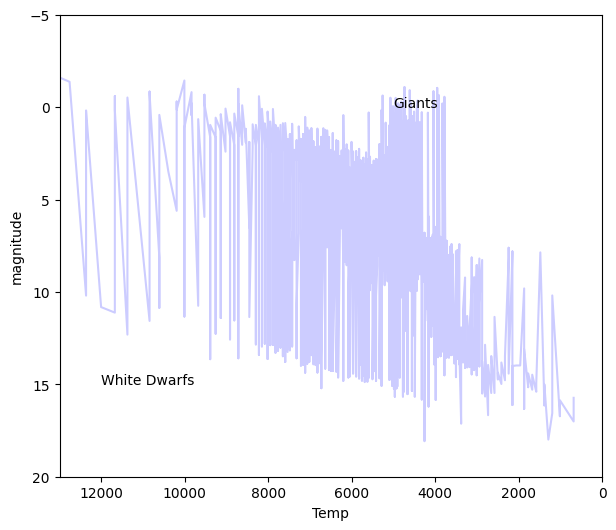

In [20]:
# open a figure
plt.figure(figsize=(7,6))

# use the plt.plot command to plot magnitude versus temperature
# plot the points using blue stars
# set alpha=.2 so you can see the points better
plt.plot(temp,mag,alpha=.2,color='blue')


# limit the x range uto (0,13000) using plt.xlim()
plt.xlim(0,13000)

# limit the x range uto (-5,20) using plt.ylim()
plt.ylim(-5,20)

# invert the x axis so that high lumonisities are on the left
ax = plt.gca()
ax.invert_xaxis()

# invert the y axis because magnitudes are weird in that
# brighter objects have lower magnitudes
ax.invert_yaxis()

# label your x and y axis
plt.xlabel("Temp")
plt.ylabel("magnitude")

# the sequence in the lower left is white dwarfs

# add a text label to show where the white dwarfs are
# using plt.text()  (use help(plt.text) to learn how to use it.)
plt.text(12000,15,"White Dwarfs")

# the sequence around T=5000 and magnitude=0 are giants
# add a label to show where the giants are using plt.text()
plt.text(5000,0,"Giants")

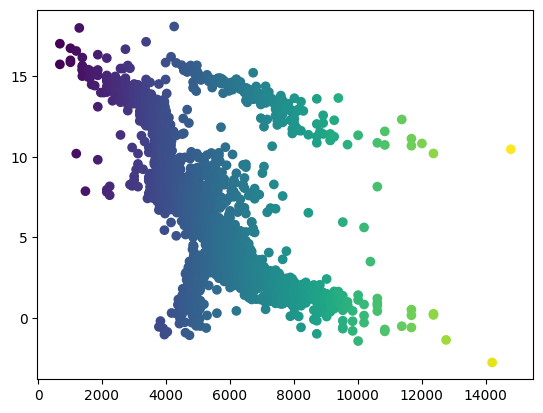

In [24]:
# plot again using the scatter plot command,
# and color code by the temperature of the star
# note that c=mycolor is how you add color to the scatter plot.
plt.scatter(temp,mag,c=temp)

# Polar Plot

(5 points)

* Sometimes it's useful to visualize data using a polar plot.
* The following example is from https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

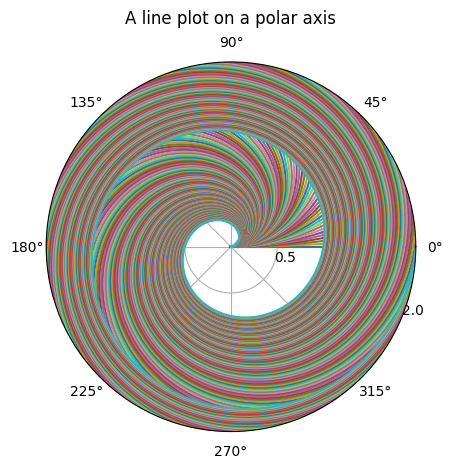

In [25]:
# create an array of radial values, r, that range from 0 to 2 with 200 steps
r = np.linspace(0,2,200)
# create an array of angles, theta, that is 2*np.pi*r
theta = np.linspace(0,2*np.pi*r,200)

# the main plotting commands are in place below
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

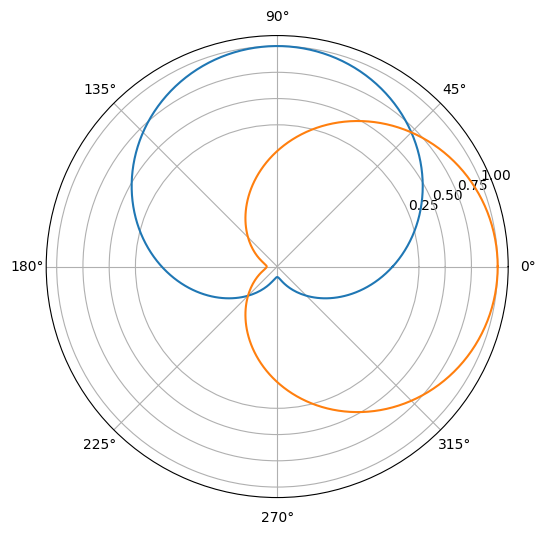

In [27]:
# make another polar plot showing sine and cosine of theta
# let theta range from zero to 2 pi, with 200 steps

theta = np.linspace(0,2*np.pi,200)
r = np.sin(theta)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(6,6))

ax.plot(theta, r)

# enter code to plot cos(theta)
r1 = np.cos(theta)

ax.set_rticks([0.25, .5, .75,1])  # Less radial ticks
ax.grid(True)
ax.plot(theta, r1)


# Displaying an image

(5 points)

We will use matplotlib's image module to display a jpg image.

In [28]:
# here we are downloading an image from the web using the linux tool wget
# the exclamation point tells us that this is a linux command
!wget http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg

--2024-01-29 20:12:06--  http://www.envisionarchitects.com/files/9615/5017/1251/Siena_Obs_3.jpg
Resolving www.envisionarchitects.com (www.envisionarchitects.com)... 205.134.241.102
Connecting to www.envisionarchitects.com (www.envisionarchitects.com)|205.134.241.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271505 (265K) [image/jpeg]
Saving to: ‘Siena_Obs_3.jpg’

Siena_Obs_3.jpg     100%[===================>] 265.14K  --.-KB/s    in 0.05s   

2024-01-29 20:12:06 (4.72 MB/s) - ‘Siena_Obs_3.jpg’ saved [271505/271505]



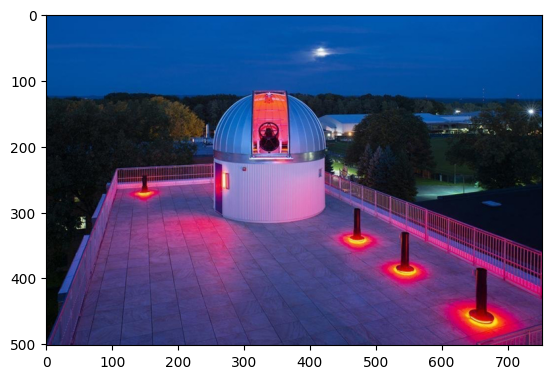

In [29]:
# we will use the image reader from matplotlib
# (there are other options - feel free to google)
# enter the image name below
myimage = image.imread("Siena_Obs_3.jpg")

plt.imshow(myimage)

### Display another image
Select another image to plot.  You can download the image from the web, or upload an image to your drive folder.  Or take a selfie!

To upload an image from your computer, type the following in a separate cell to start an interactive dialog where you can select your image.

```python
from google.colab import files
uploaded = files.upload()


```

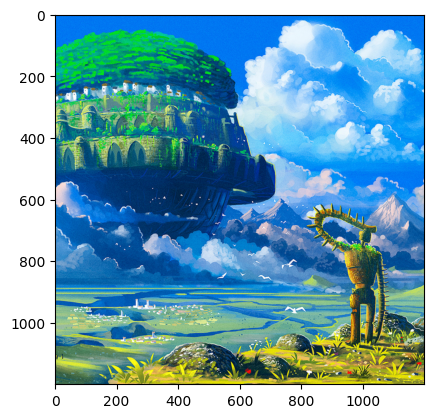

In [44]:
# code to plot your second image here
myimage = image.imread("/content/laputa.jpg")

plt.imshow(myimage)

# Fitting a Straight Line to Data (Adapted from Newman Problem 3.8)

(5 points)

* download the datafile millikan.txt from http://www-personal.umich.edu/~mejn/cp/data/millikan.txt
* This is historic data from Rober Millikan that measured the photoelectric effect.
* Read in the data using np.loadtxt
  * the first colum is the frequence $\nu$ in hertz
  * the second column is the voltage $V$ in volts.
* Fit a line to the data using np.polyfit
```python
c = np.polyfit(x,y,1)
```

* Plot the best-fit line with the data. The following should be useful:
```python
xline = np.linspace(xmin,xmax,100)
yline = np.polyval(c,xline)
```

* The physical equation that determines the best-fit line is
$$V = \frac{h}{e} \nu - \phi $$
where
  * V is the voltage of the ejected electron
  * $\nu$ is the frequency of the light that shines on the metal
  * $\phi$ is the amount of energy needed to remove the electron from the metal, also known as the work function.
  * $h$ is Planck's constant
  * $e=1.6 \times 10^{-19}$ C is the charge of the electron in Coulombs.

* From your best fit slope and intercept, determine the values of the work function and Planck's constant.



--2024-01-29 20:28:33--  https://websites.umich.edu/~mejn/cp/data/millikan.txt
Resolving websites.umich.edu (websites.umich.edu)... 141.211.243.103
Connecting to websites.umich.edu (websites.umich.edu)|141.211.243.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108 [text/plain]
Saving to: ‘millikan.txt.8’

millikan.txt.8      100%[===================>]     108  --.-KB/s    in 0s      

2024-01-29 20:28:34 (12.7 MB/s) - ‘millikan.txt.8’ saved [108/108]

Our work function is -1.7312358039813522
Our Plancks Constant is 4.088227358517508e-15EV


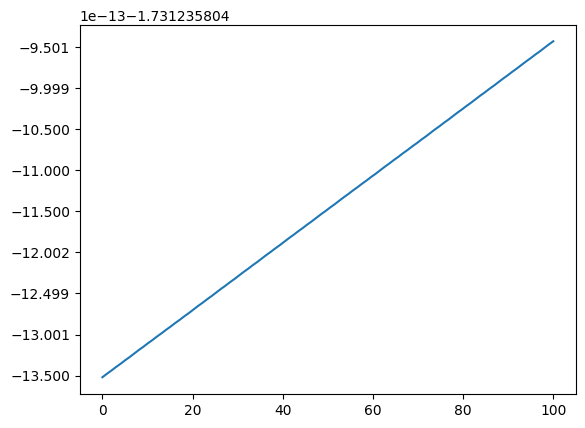

In [40]:
# enter your code here
# first create a series of comments to describe what your code will do
# then develop the code

#Download our data
!wget https://websites.umich.edu/~mejn/cp/data/millikan.txt
#Read our data in
photoelectric = np.loadtxt('millikan.txt')
hertz = photoelectric[:,0]
volts = photoelectric[:,1]
#Create a best fit line
c = np.polyfit(hertz,volts,1)
#Plot our best fit line
xmin = 0
xmax = 100
xline = np.linspace(xmin,xmax,100)
yline = np.polyval(c,xline)
plt.figure()
plt.plot(xline,yline)
#Print our values of the work function and plancks constant
print(f"Our work function is {c[1]}")
print(f"Our Plancks Constant is {c[0]}EV")

# Histogram of Data

(5 points)

* Histograms are useful for looking at the distribution of values for one particular quantity.
* In this problem, we will generate 100 random values that are drawn from a Gaussian distribution, and we will then plot the values in a histogram.
* We will then calculate the average and standard deviation, and show these values on the graph.

* Read through the output from help - what do you expect the mean and standard deviation to be?

In [ ]:
# explore the function using help
help(np.random.normal)

average value = 0.07
the STD = 1.05


(array([  5.,  21.,  63., 148., 223., 230., 179.,  95.,  27.,   9.]),
 array([-3.18048924, -2.56594749, -1.95140575, -1.336864  , -0.72232225,
        -0.10778051,  0.50676124,  1.12130299,  1.73584474,  2.35038648,
         2.96492823]),
 <BarContainer object of 10 artists>)

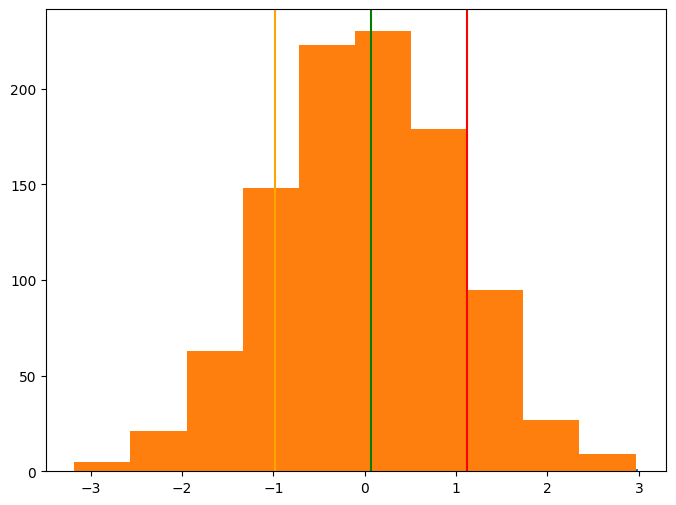

In [50]:
plt.figure(figsize=(8,6))

gauss_values = np.random.normal(size=100)
plt.hist(gauss_values)
print("average value = {:.2f}".format(np.mean(gauss_values)))
print("the STD = {:.2f}".format(np.std(gauss_values)))

# add code to plot a vertical line at the average
# use plt.axvline()
plt.axvline(np.mean(gauss_values),c='green')
# add code to plot dotted vertical lines at
# average + std
# average - std
plt.axvline(np.mean(gauss_values)+np.std(gauss_values),c = 'red',ls='-')
plt.axvline(np.mean(gauss_values)-np.std(gauss_values),c = 'orange',ls='-')
# once your figure is set, try increasing the sample size
gauss_values = np.random.normal(size=1000)
plt.hist(gauss_values)
# what happens to the mean and std as the sample size increases?
#they stay the same

# Multipanel Plot

(5 points)
* create a plot with 4 panel - two columns and two rows.  You can call the top plot using plt.subplot(nrow,ncol,nplot), or
```python
plt.subplot(2,2,1)
```
* plot $sin(\theta)$ vs. $\theta$ in the first panel.
* plot $cos(\theta)$ vs. $\theta$ in the second panel.
* plot $tan(\theta)$ vs. $\theta$ in the third panel.
* plot all three functions together in the fourth panel.
* use np.cos, np.sin, np.tan

100


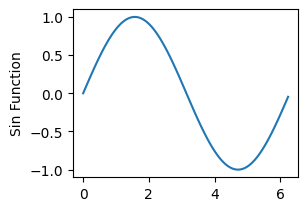

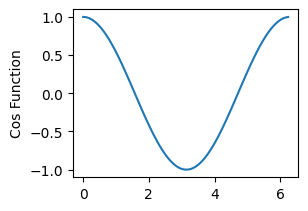

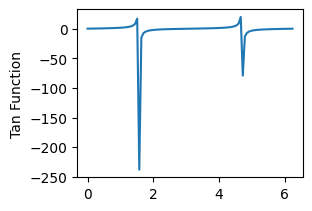

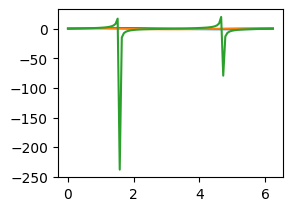

In [58]:
# Your code here
plt.figure()
plt.subplot(2,2,1)
x = np.arange(0, 2*np.pi, 0.063)
print(len(x))
y = np.sin(x)
plt.ylabel("Sin Function")
plt.plot(x, y)
plt.show()

plt.subplot(2,2,2)
x1 = np.arange(0, 2*np.pi, 0.063)
y1 = np.cos(x1)
plt.ylabel("Cos Function")
plt.plot(x1, y1)
plt.show()

plt.subplot(2,2,3)
x2 = np.arange(0, 2*np.pi, 0.063)
y2 = np.tan(x2)
plt.ylabel("Tan Function")
plt.plot(x2, y2)
plt.show()

plt.subplot(2,2,4)
plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)

# 3D Plots

(5 points)

* Below is an example of a 3D plot, just for future reference.
* You don't need to add anything except a title that indicates some physical situation where this type of motion could arise.
*NOTE: if you run this cell on your own installation of notebook, you will be able to move the plot around to view it from different angles.

Text(0.5, 0, 'time')

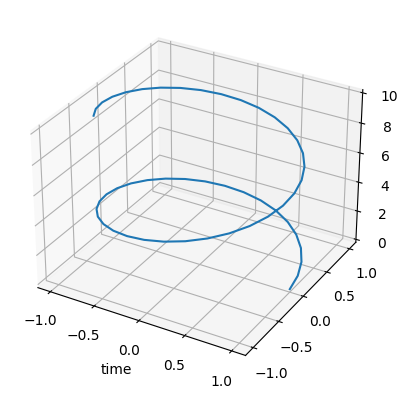

In [60]:
fig = plt.figure()

# keeping the projection = 3d
# ctreates the 3d plot
ax = plt.axes(projection = '3d')
time = np.linspace(0,10)
x = np.cos(time)
y = np.sin(time)
plt.plot(x,y,time)

# add your title here!
plt.xlabel("time")

# One final plot of your choice

(5 points)

* Check out the Examples and Tutorials on the [matplotlib website](https://matplotlib.org/stable/index.html).
* Select a plot that you like and replicate the code here.

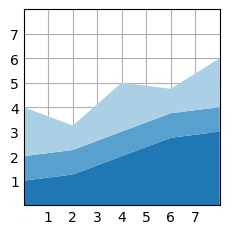

In [61]:
plt.style.use('_mpl-gallery')

# make data
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

# Summarizing What Your Learning and Saving Your Work

* Save your notebook to github.
* On your wiki, create a summary page of the important points covered in this lab.
* This should be similar to the reference cheat-sheets, rather than a paragraph summary. So include code snippets and explanatory text.
